# Propensity to buy Term Deposit

# EDA on the Dataset

In [1]:
#Change directory and load catalog and pipeline from Kedro
%cd "D:\University\CST4090 - Thesis\Propensity Model\thesis-propensity-model"
%reload_kedro

D:\University\CST4090 - Thesis\Propensity Model\thesis-propensity-model


[09/24/22 23:24:07] INFO     No path argument was provided. Using: D:\University\CST4090 -            ]8;id=457924;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=847491;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#55\55]8;;\
                             Thesis\Propensity Model\thesis-propensity-model                                       

[09/24/22 23:24:08] INFO     Kedro project thesis_propensity_model                                    ]8;id=586684;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=491163;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=315856;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=519200;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#79\79]8;;\

                    INFO     Registered line magic 'reload_kedro_mlflow'                              ]8;id=963184;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=292391;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#85\85]8;;\

                    INFO     Registered line magic 'run_viz'                                          ]8;id=174512;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=5114;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#85\85]8;;\

In [2]:
#Loading packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

[09/24/22 23:24:09] WARNING  C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\seaborn\rcm ]8;id=540315;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py\warnings.py]8;;\:]8;id=52004;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py#109\109]8;;\
                             od.py:82: DeprecationWarning: distutils Version classes are                           
                             deprecated. Use packaging.version instead.                                            
                               if LooseVersion(mpl.__version__) >= "3.0":                                          
                                                                                                                   

                    WARNING  C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\setuptools\ ]8;id=773688;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py\warnings.py]8;;\:]8;id=990309;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py#109\109]8;;\
                             _distutils\version.py:351: DeprecationWarning: distutils Version                      
                             classes are deprecated. Use packaging.version instead.                                
                               other = LooseVersion(other)                                                         
                                                                                                                   

In [3]:
#Load the Raw Dataset
bank_raw=catalog.load("bank_raw")

[09/24/22 23:24:10] INFO     Loading data from 'bank_raw' (CSVDataSet)...                       ]8;id=322509;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=377416;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [4]:
#Check number of columns and rows of dataset
bank_raw.shape

(41188, 21)

In [5]:
#See column names of the dataset
bank_raw.columns.to_list()

[
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    'y'
]

In [6]:
#Verify top rows of the dataframe
bank_raw.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#Describe the dataframe and understand the field distribution
bank_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
bank_raw.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
#Check for nulls
bank_raw.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
#Loop through all columns and print unique value counts
for col in bank_raw.columns:
        print(col)
        print(bank_raw[col].value_counts(),end="\n")


age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: hou

In [12]:
#Description of the columns
bank_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Demographics

age - client's age in years (numeric)

job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)

marital - marital status (categorical: divorced, married, single, unknown)

education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)


Financial/product Holding

default - has credit in default? (categorical: no, yes, unknown)

housing - has housing loan? (categorical: no, yes, unknown)

loan - has personal loan? (categorical: no, yes, unknown)


Previous campaign details

contact - contact communication type (categorical: cellular, telephone)

month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)

day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)

duration - last contact duration, in seconds (numeric).

campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)

pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the 
client has not been previously contacted)

previous - number of contacts performed for this client before this campaign (numeric)

poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)


Indicators

emp.var.rate - employment variation rate, quarterly indicator (numeric)

cons.price.idx - consumer price index, monthly indicator (numeric)

cons.conf.idx - consumer confidence index, monthly indicator (numeric)

euribor3m - euribor 3 month rate, daily indicator (numeric)

nr.employed - number of employees, quarterly indicator (numeric)


Output feature (desired target):

y - has the client subscribed a term deposit? (binary: yes,no)

In [13]:
#Rename the target column and create new encoded column for target
bank_raw.rename(columns={'y':'deposit'},inplace=True)
dict_target = {"no": 0, "yes": 1}
bank_raw["deposit_encoded"] = bank_raw["deposit"].map(dict_target)
bank_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,deposit_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [14]:
#Print share of customers with term deposit
print("Share of customers with term deposit =", '{:.1%}'.format(bank_raw["deposit_encoded"].mean()))

Share of customers with term deposit = 11.3%


In [15]:
#Count of Customers with and without deposit
bank_raw["deposit"].value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

From a business perspective, the number of active customers holding deposit is very less which is not good for the bank as liabilities/deposits lead to balance the books. 

From modelling perspective, the target class is imbalanced and needs to be taken care while model training 

In [16]:
bank_raw[bank_raw["deposit_encoded"] == 1].mean() 

age                  40.913147
duration            553.191164
campaign              2.051724
pdays               792.035560
previous              0.492672
emp.var.rate         -1.233448
cons.price.idx       93.354386
cons.conf.idx       -39.789784
euribor3m             2.123135
nr.employed        5095.115991
deposit_encoded       1.000000
dtype: float64

In [17]:
bank_raw[bank_raw["deposit_encoded"] == 0].mean() 

age                  39.911185
duration            220.844807
campaign              2.633085
pdays               984.113878
previous              0.132374
emp.var.rate          0.248875
cons.price.idx       93.603757
cons.conf.idx       -40.593097
euribor3m             3.811491
nr.employed        5176.166600
deposit_encoded       0.000000
dtype: float64

# Data Visualization

<seaborn.axisgrid.FacetGrid object at 0x00000223FE2CA8C0>

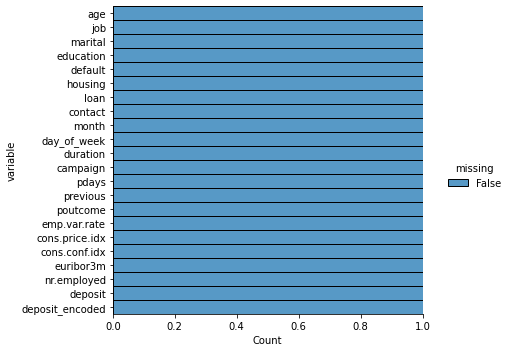

In [18]:
plt.figure(figsize=(10,6))
sns.displot(
    data=bank_raw.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [19]:
bank_raw

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,deposit_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


<seaborn.axisgrid.FacetGrid object at 0x00000223FE2CAE00>

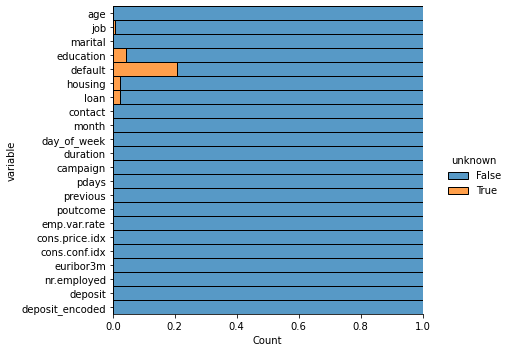

In [20]:
plt.figure(figsize=(10,6))
sns.displot(
    data=bank_raw.replace('unknown', np.nan).isna().melt(value_name="unknown"),
    y="variable",
    hue="unknown",
    multiple="fill",
    aspect=1.25
)

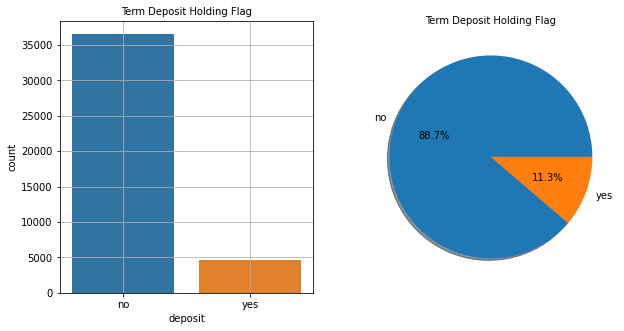

In [21]:
#Target Product Holding Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=bank_raw)
plt.title("Term Deposit Holding Flag",size = 10)
plt.grid()
plt.subplot(1,2,2)
labels =bank_raw['deposit'].value_counts(sort = True).index
sizes = bank_raw['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Term Deposit Holding Flag',size = 10)
plt.show()

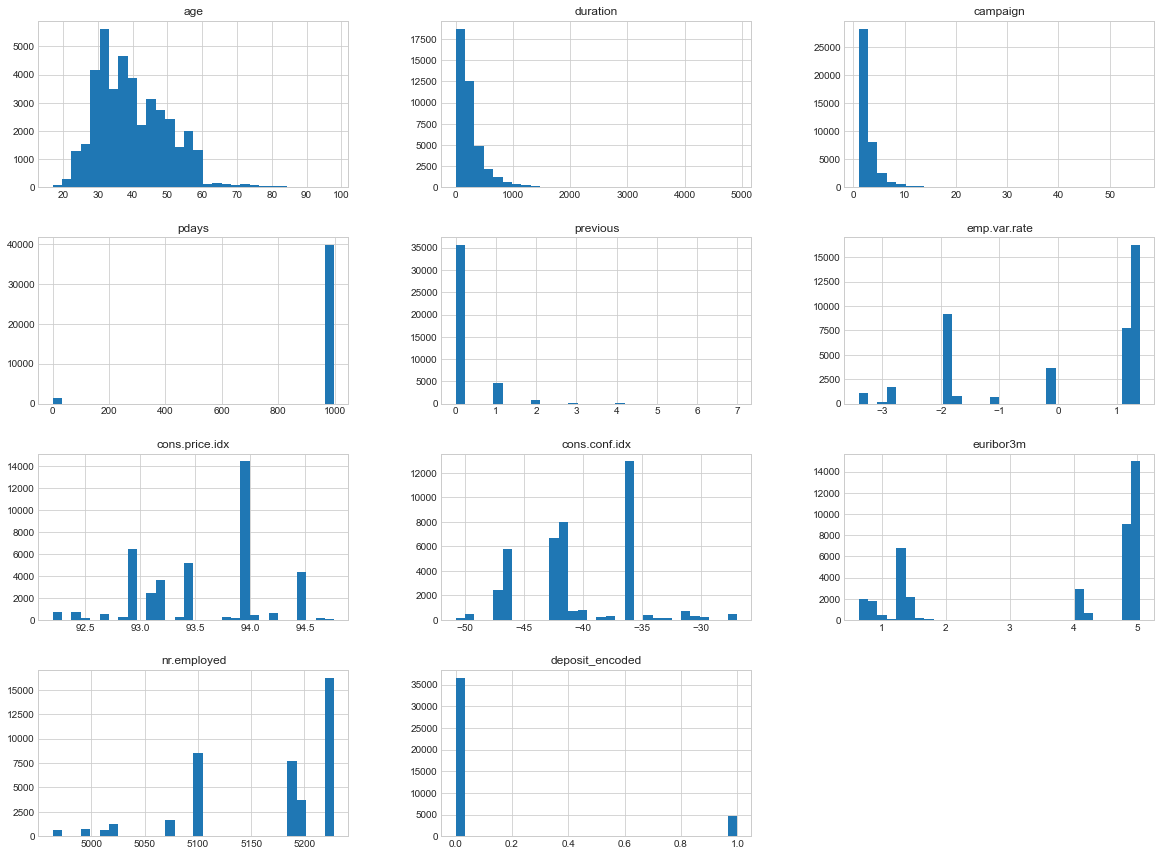

In [22]:
plt.style.use('seaborn-whitegrid')

bank_raw.hist(bins=30, figsize=(20,15))
plt.show()

In [23]:
#Plot Numerical features and categorical as boxplot and countplot

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorics=['object']

bank_raw_cat = bank_raw.select_dtypes(include=categorics)
bank_raw_num = pd.concat([bank_raw.select_dtypes(include=numerics),bank_raw[['deposit']]],axis=1)

bank_raw_num_columns=bank_raw.select_dtypes(include=numerics)

print(bank_raw_cat.columns)
print(bank_raw_num.columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'deposit_encoded', 'deposit'],
      dtype='object')


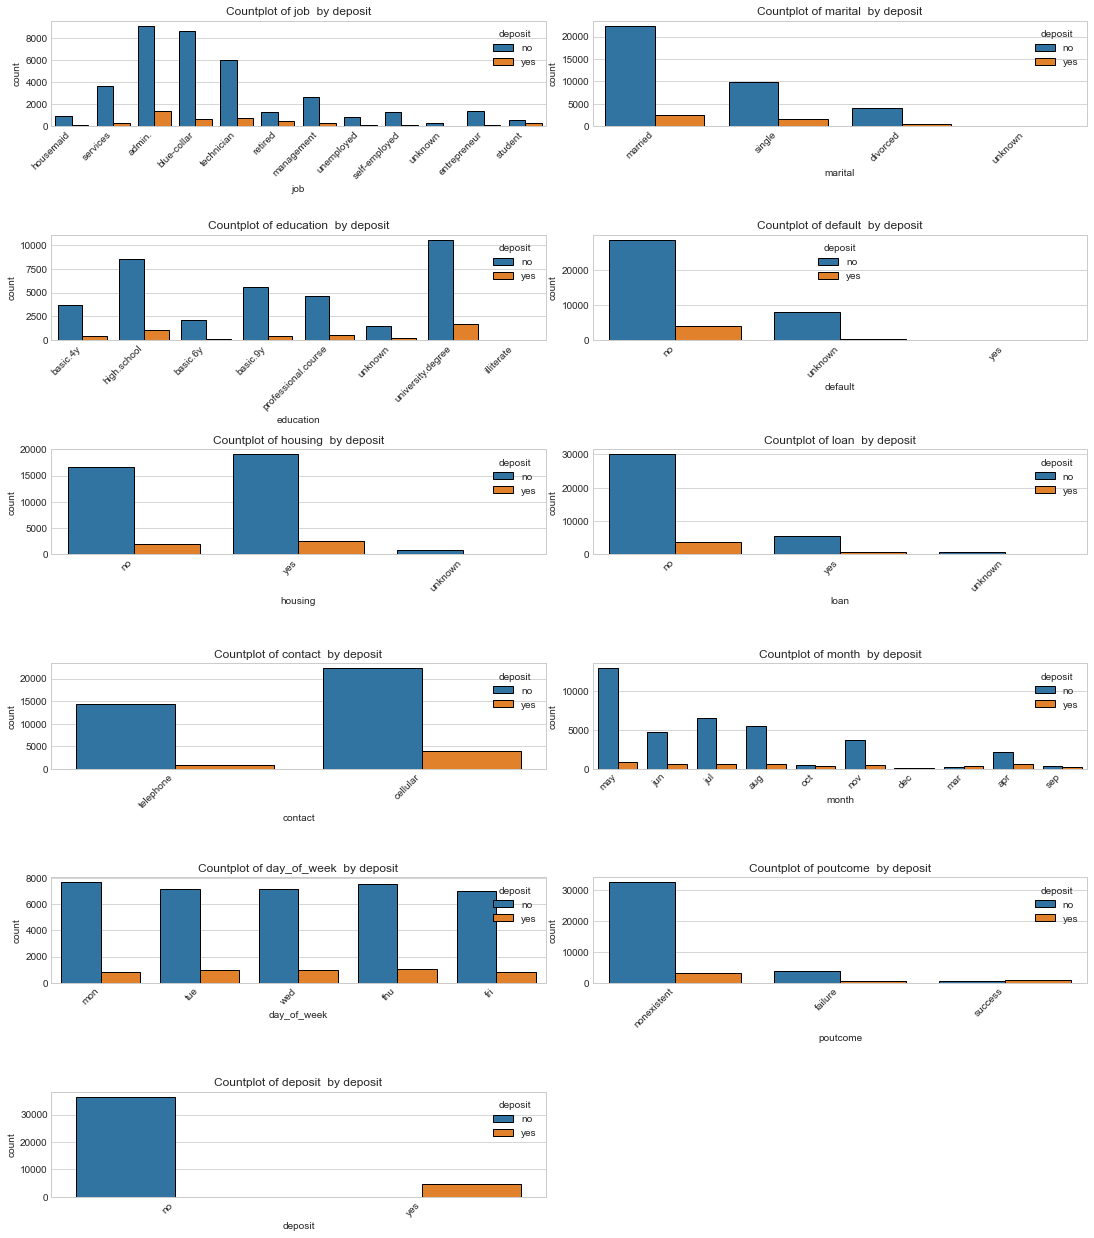

In [24]:
#Plot categorical features
plt.figure(figsize=(15,17))
for i,cat_fea in enumerate(bank_raw_cat):
    plt.subplot(6,2,i+1)
    chart=sns.countplot(x=cat_fea,hue='deposit',data=bank_raw_cat,edgecolor="black")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout(pad=0., w_pad=0.3, h_pad=1.0)    
plt.show()

The Imbalanced nature of term deposit holding makes it difficult to get insights from the countplot, lets understand how boxplot is able to segregate feature for the target variable

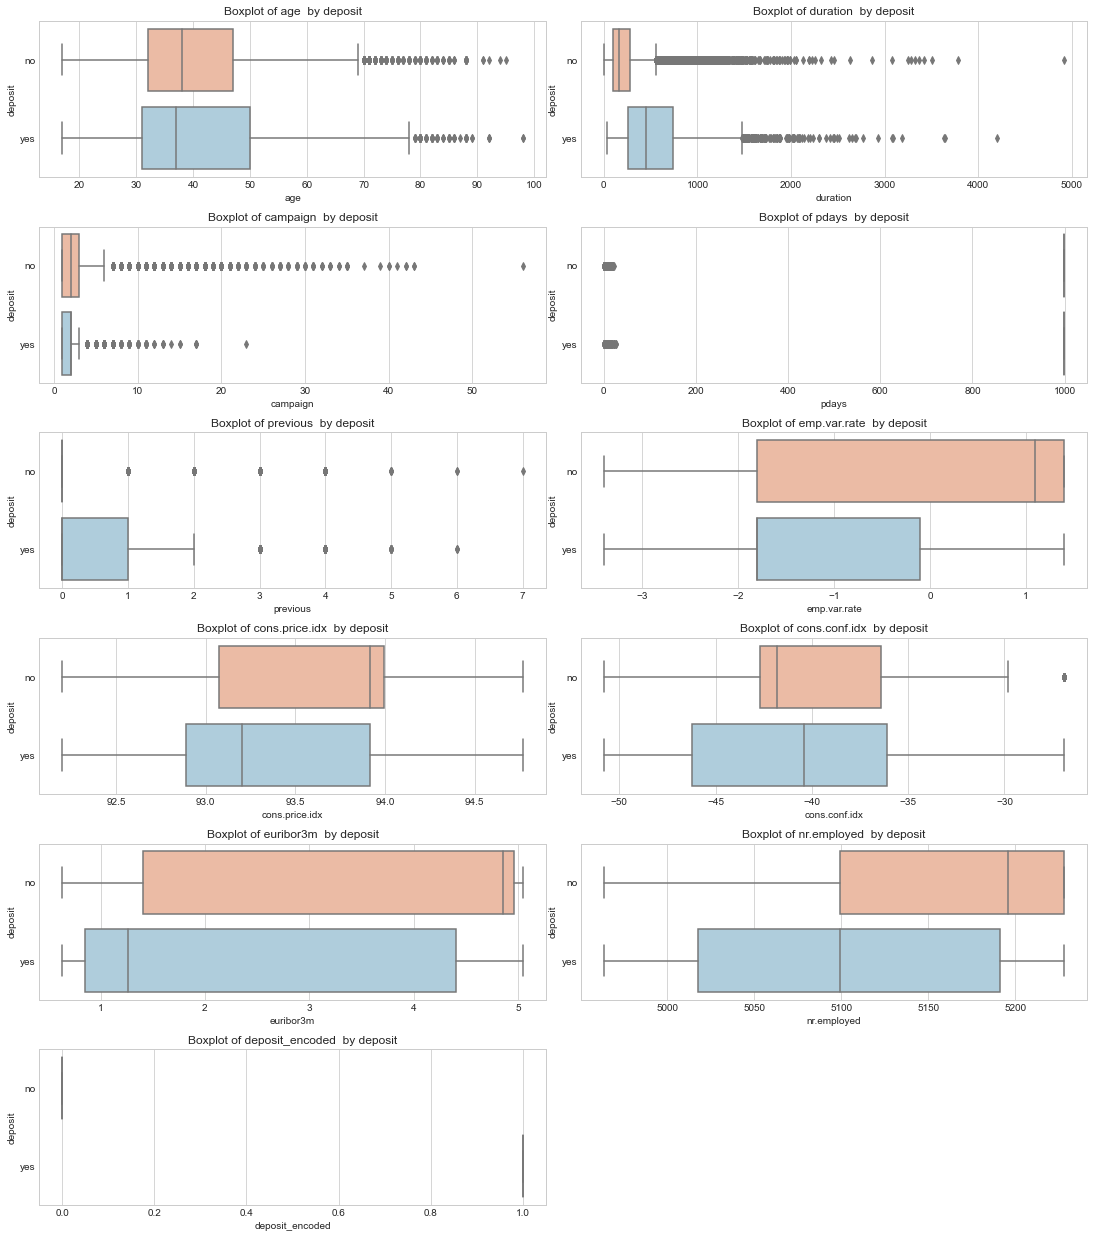

In [25]:
#Plot Numerical features
plt.figure(figsize=(15,17))
for i,num_fea in enumerate(bank_raw_num_columns):
    plt.subplot(6,2,i+1)
    chart=sns.boxplot(x=num_fea,y='deposit',data=bank_raw_num,palette="RdBu")
    plt.title("Boxplot of {}  by deposit".format(num_fea))
plt.tight_layout(pad=0., w_pad=0.3, h_pad=1.0)    
plt.show()

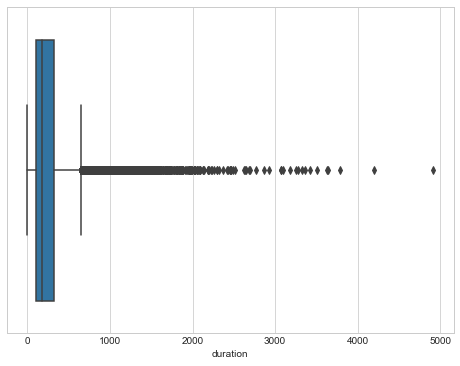

In [26]:
sns.boxplot(x=bank_raw["duration"])

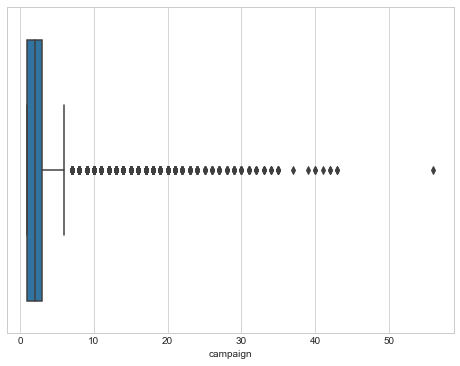

In [27]:
sns.boxplot(x=bank_raw["campaign"])

We see the duration and previous contact to customer has definitely led to more suscriptions to product

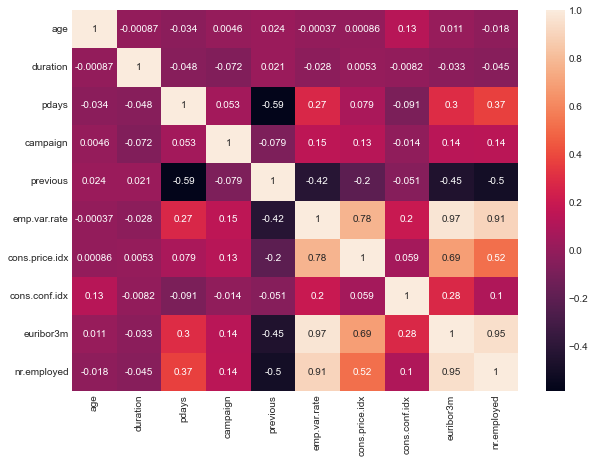

In [28]:
#Correlation Heatmap
bank_raw_df = bank_raw[['age', 'duration', 'pdays', 'campaign', 'previous','emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
plt.figure(figsize=(10,7))
sns.heatmap(data=bank_raw_df.corr(), annot=True)
plt.show()

the feature "previous" seems to have have high correlation with pdays and all the economic indicators have high correlation to each other and may lead to multicollinearity issue.

In [29]:
checkdf=bank_raw[['pdays','previous']]

In [30]:
checkdf.pivot_table(index='pdays', columns='previous', 
                        aggfunc=len, fill_value=0)

previous,0,1,2,3,4,5,6,7
pdays,,,,,,,,
0,0,7,4,2,1,1,0,0
1,0,16,5,3,1,0,1,0
2,0,42,12,3,3,1,0,0
3,0,250,114,43,19,9,3,1
4,0,73,29,14,2,0,0,0
5,0,28,11,5,0,2,0,0
6,0,220,117,57,16,2,0,0
7,0,26,23,8,3,0,0,0
8,0,9,6,2,1,0,0,0


The correlation is due to 34521 customers not contacted so comes in pdays(999) and previous contact 0. So pdays can be removed as previous is a stronger feature.

# Preprocessing Data

In [31]:
#Duration and campaign has most outliers and needs to be treated

#Duration 1500 based on boxplot and campaign of 10

bank_int=bank_raw[~(bank_raw['campaign']>10)]
bank_int=bank_int[~(bank_int['duration']>1500)]



# cols = ['duration','campaign'] 

# # Calculate quantiles and IQR
# Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# # Return a boolean array of the rows with (any) non-outlier column values
# condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# # Filter our dataframe based on condition
# filtered_df = df[condition]

In [32]:
#Drop pdays and the encoded deposit
bank_int = bank_int.drop(columns=['pdays', 'deposit_encoded'])

In [33]:
bank_int.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [34]:
bank_int.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Imputation of data

In [35]:
#Education, default, marital, housing and loan have unknown in them
#education, 4% unknown and no clear major value, so knn imputation
#default, also mode as predominantly (80%) is no
#marital represent 0.2% and can be replaced by mode (married)
#Housing,knn imputation
#Loan,mode (no)


bank_int[['education','default','marital','housing','loan']] = bank_int[['education','default','marital','housing','loan']].replace('unknown', np.nan)


In [36]:
#Check nan
bank_int['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [37]:
#Mode imputation
mode_col=['default','marital','loan','education','housing']
for col in mode_col:
    bank_int[col] = bank_int[col].fillna(bank_int[col].mode()[0])

In [38]:
bank_int['loan'].value_counts()

no     34036
yes     6080
Name: loan, dtype: int64

In [39]:
# # Knn imputation
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=15)

# imputed = imputer.fit_transform(bank_int_cp['education'])
# # df_imputed = pd.DataFrame(imputed, columns=df.columns)


Taking care of Collinear features (Economic Indicators)

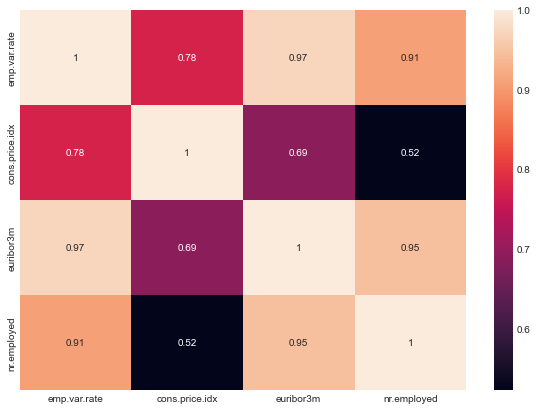

In [40]:
#Correlation Heatmap
bank_econind = bank_raw[['emp.var.rate','cons.price.idx', 'euribor3m', 'nr.employed']]
plt.figure(figsize=(10,7))
sns.heatmap(data=bank_econind.corr(), annot=True)
plt.show()

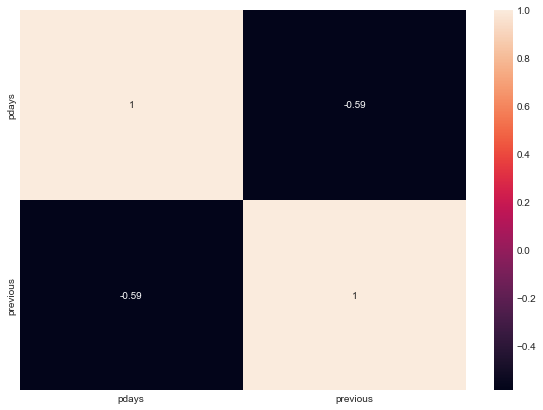

In [41]:
#Correlation Heatmap
bank_econind = bank_raw[['pdays','previous']]
plt.figure(figsize=(10,7))
sns.heatmap(data=bank_econind.corr(), annot=True)
plt.show()

In [42]:
factordf=bank_int[['emp.var.rate','cons.price.idx','euribor3m','nr.employed']]

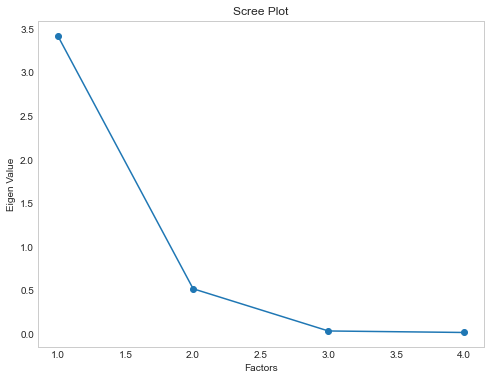

In [43]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=factordf.shape[1])
fa.fit(factordf)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,factordf.shape[1]+1),ev)
plt.plot(range(1,factordf.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [44]:
bank_int["Economic_Indicators"]=FactorAnalysis(n_components=1).fit_transform(bank_int[['emp.var.rate',
                                                                                      'cons.price.idx',
                                                                                      'euribor3m','nr.employed']])

In [45]:
bank_int=bank_int.drop(['emp.var.rate','cons.price.idx','euribor3m','nr.employed'],axis=1)

In [46]:
bank_int.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,deposit,Economic_Indicators
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,-36.4,no,-0.72125
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,0,nonexistent,-36.4,no,-0.72125
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,-36.4,no,-0.72125
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,-36.4,no,-0.72125
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,-36.4,no,-0.72125
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,0,nonexistent,-36.4,no,-0.72125
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,-36.4,no,-0.72125
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,0,nonexistent,-36.4,no,-0.72125
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,-36.4,no,-0.72125
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,-36.4,no,-0.72125


In [47]:
bank_int.shape

(40116, 17)

In [48]:
#Remove duplicates

bank_int=bank_int.drop_duplicates()
bank_int.shape

(40102, 17)

In [49]:
bank_int.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,deposit,Economic_Indicators
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,-36.4,no,-0.72125
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,0,nonexistent,-36.4,no,-0.72125
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,-36.4,no,-0.72125
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,-36.4,no,-0.72125
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,-36.4,no,-0.72125
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,0,nonexistent,-36.4,no,-0.72125
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,-36.4,no,-0.72125
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,0,nonexistent,-36.4,no,-0.72125
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,-36.4,no,-0.72125
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,-36.4,no,-0.72125


In [50]:
from sklearn.preprocessing import LabelEncoder
#create dict for binary encoding
dic = {"yes":1,"no":0}
lst = ["deposit","loan","default","housing"]
for i in lst:
    bank_int[i] = bank_int[i].map(dic)

In [51]:
# Ordinal Encoding
l=['month',"day_of_week","contact","poutcome"]
le=LabelEncoder()
for i in l:
    bank_int[i]=le.fit_transform(bank_int[i].values)

In [52]:
# OneHot Encoding 
bank_int = pd.get_dummies(bank_int, columns = ['job','marital','education'])

In [53]:
bank_int.head(10)

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,0,1,6,1,261,1,0,...,0,1,0,1,0,0,0,0,0,0
1,57,0,0,0,1,6,1,149,1,0,...,0,1,0,0,0,0,1,0,0,0
2,37,0,1,0,1,6,1,226,1,0,...,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,1,6,1,151,1,0,...,0,1,0,0,1,0,0,0,0,0
4,56,0,0,1,1,6,1,307,1,0,...,0,1,0,0,0,0,1,0,0,0
5,45,0,0,0,1,6,1,198,1,0,...,0,1,0,0,0,1,0,0,0,0
6,59,0,0,0,1,6,1,139,1,0,...,0,1,0,0,0,0,0,0,1,0
7,41,0,0,0,1,6,1,217,1,0,...,0,1,0,0,0,0,0,0,0,1
8,24,0,1,0,1,6,1,380,1,0,...,0,0,1,0,0,0,0,0,1,0
9,25,0,1,0,1,6,1,50,1,0,...,0,0,1,0,0,0,1,0,0,0


In [54]:
bank_int=bank_int.reset_index()

In [55]:
bank_int.drop('index',axis=1,inplace=True)

In [56]:
bank_int

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,0,1,6,1,261,1,0,...,0,1,0,1,0,0,0,0,0,0
1,57,0,0,0,1,6,1,149,1,0,...,0,1,0,0,0,0,1,0,0,0
2,37,0,1,0,1,6,1,226,1,0,...,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,1,6,1,151,1,0,...,0,1,0,0,1,0,0,0,0,0
4,56,0,0,1,1,6,1,307,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40097,73,0,1,0,0,7,0,334,1,0,...,0,1,0,0,0,0,0,0,1,0
40098,46,0,0,0,0,7,0,383,1,0,...,0,1,0,0,0,0,0,0,1,0
40099,56,0,1,0,0,7,0,189,2,0,...,0,1,0,0,0,0,0,0,0,1
40100,44,0,0,0,0,7,0,442,1,0,...,0,1,0,0,0,0,0,0,1,0


In [57]:
bank_int['deposit'].value_counts()

0    35618
1     4484
Name: deposit, dtype: int64

In [58]:
X=bank_int.drop('deposit',axis=1)
Y=bank_int['deposit']

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [60]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for train_index,test_index in sss.split(X,Y):
    train_df = bank_int.loc[train_index]
    test_df = bank_int.loc[test_index]

In [61]:
print("Ratio for train dataset")
print(train_df['deposit'].value_counts()/train_df.shape[0])
print()
print("ratio for test dataset")
print(test_df['deposit'].value_counts()/test_df.shape[0])

Ratio for train dataset
0    0.888176
1    0.111824
Name: deposit, dtype: float64

ratio for test dataset
0    0.888205
1    0.111795
Name: deposit, dtype: float64


In [62]:
X_train = train_df.drop("deposit",axis=1)
Y_train = train_df['deposit']

X_test = test_df.drop("deposit",axis=1)
Y_test = test_df['deposit']

In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

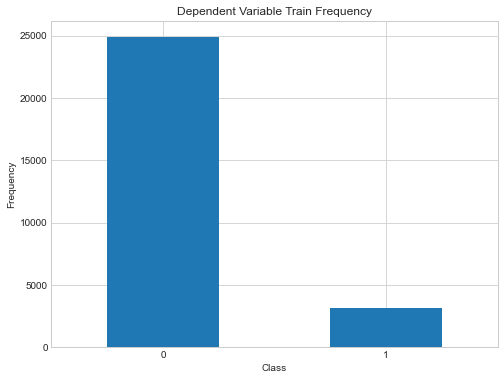

In [64]:
#Lets check the balance of the Target variable dataset (Whether the class have similar representation)
count_classes=pd.value_counts(Y_train,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Dependent Variable Train Frequency')
plt.xlabel("Class")
plt.ylabel("Frequency")

In [65]:
#Balance Train dataset
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train, Y_train)

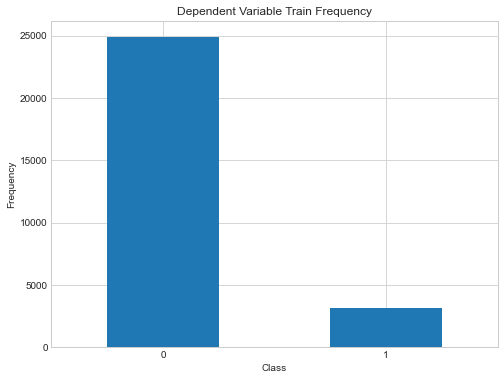

In [66]:
#Lets check the balance of the Target variable dataset (Whether the class have similar representation)
count_classes=pd.value_counts(Y_train,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Dependent Variable Train Frequency')
plt.xlabel("Class")
plt.ylabel("Frequency")

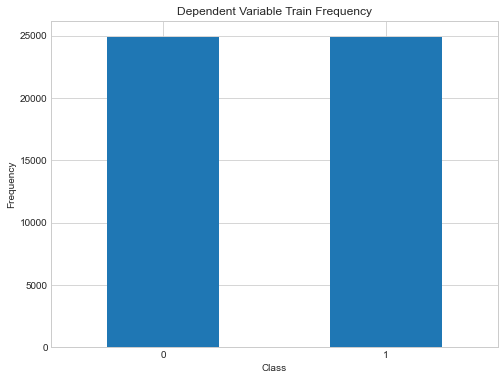

In [67]:
#Lets check the balance of the Target variable dataset (Whether the class have similar representation)
count_classes=pd.value_counts(Y_smote,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Dependent Variable Train Frequency')
plt.xlabel("Class")
plt.ylabel("Frequency")

# Model Training

In [68]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [69]:
#Logistic Regression
lr= LogisticRegression()

lr.fit(X_smote,Y_smote)
Y_pred_lr = lr.predict(X_test)

print("Testing Accuracy of LogisticRegression : ",metrics.accuracy_score(Y_test,Y_pred_lr))
#print("Accuracy of LogisticRegression",pipe_lr.score(X_test,Y_test))

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_s,Y_train))

Testing Accuracy of LogisticRegression :  0.8868755714404455
Training Accuracy of LogisticRegression :  0.5130561789747426


In [70]:
print(classification_report(Y_test,Y_pred_lr))
print(confusion_matrix(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     10686
           1       0.49      0.59      0.54      1345

    accuracy                           0.89     12031
   macro avg       0.72      0.76      0.74     12031
weighted avg       0.90      0.89      0.89     12031

[[9881  805]
 [ 556  789]]


In [71]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=5)

gb.fit(X_smote,Y_smote)
y_train_preds = gb.predict(X_smote)
y_test_preds = gb.predict(X_test_s)

print('The accuracy of the GB is',metrics.accuracy_score(Y_test,y_test_preds))
print('The accuracy of the GB is',metrics.accuracy_score(y_train_preds,Y_smote))

The accuracy of the GB is 0.8855456736763362
The accuracy of the GB is 0.937169099951869


In [72]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10686
           1       0.45      0.10      0.16      1345

    accuracy                           0.89     12031
   macro avg       0.67      0.54      0.55     12031
weighted avg       0.85      0.89      0.85     12031

[[10521   165]
 [ 1212   133]]


In [73]:
import xgboost 
xgb = xgboost.XGBClassifier(n_estimators=80, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)
xgb.fit(X_smote,Y_smote)

#calculate and print scores for the model
y_train_preds = xgb.predict(X_smote)
y_test_preds = xgb.predict(X_test)


print('The accuracy of the GB is',metrics.accuracy_score(Y_test,y_test_preds))
print('The accuracy of the GB is',metrics.accuracy_score(y_train_preds,Y_smote))

The accuracy of the GB is 0.9102319009226165
The accuracy of the GB is 0.9525308840044923


In [74]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10686
           1       0.58      0.70      0.63      1345

    accuracy                           0.91     12031
   macro avg       0.77      0.82      0.79     12031
weighted avg       0.92      0.91      0.91     12031

[[10013   673]
 [  407   938]]


In [75]:
y_test_proba = xgb.predict_proba(X_test_s)

In [76]:
len(X_test_s[0])

35

In [77]:
len(y_test_proba)

12031

In [78]:
Y_test.value_counts()

0    10686
1     1345
Name: deposit, dtype: int64

In [79]:
X_columns=list(X_train.columns)

In [80]:
X_header=pd.DataFrame(X_test_s,columns=X_columns)

In [172]:
#Benchmarking across multiple classifiers

In [81]:
X_smote=catalog.load("X_smote")
Y_smote=catalog.load("Y_smote")
Y_test=catalog.load("Y_test")
X_test_scaled=catalog.load("X_test_scaled")

[09/24/22 23:25:22] INFO     Loading data from 'X_smote' (PickleDataSet)...                     ]8;id=127442;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=664299;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

[09/24/22 23:25:23] INFO     Loading data from 'Y_smote' (PickleDataSet)...                     ]8;id=667044;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=515759;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'Y_test' (PickleDataSet)...                      ]8;id=344638;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=242217;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'X_test_scaled' (PickleDataSet)...               ]8;id=176717;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=284009;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

Scoring Parameter - accuracy
>lr 0.875 (0.006)
>knn 0.925 (0.005)
>svm 0.922 (0.005)
>bayes 0.775 (0.006)
>randomf 0.959 (0.005)
>xgb 0.953 (0.005)
>catb 0.955 (0.004)
>lgbm 0.954 (0.004)


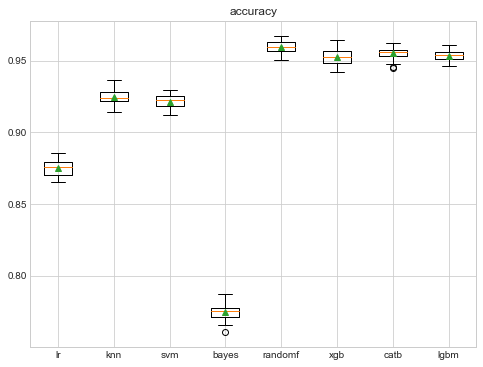

Scoring Parameter - f1
>lr 0.878 (0.006)
>knn 0.930 (0.004)
>svm 0.925 (0.004)
>bayes 0.767 (0.006)
>randomf 0.960 (0.004)
>xgb 0.953 (0.005)
>catb 0.955 (0.004)
>lgbm 0.954 (0.004)


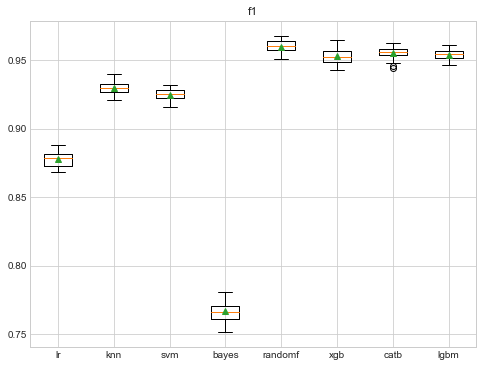

Scoring Parameter - roc_auc
>lr 0.935 (0.004)
>knn 0.969 (0.002)
>svm 0.966 (0.004)
>bayes 0.838 (0.006)
>randomf 0.995 (0.001)
>xgb 0.993 (0.001)
>catb 0.994 (0.001)
>lgbm 0.994 (0.001)


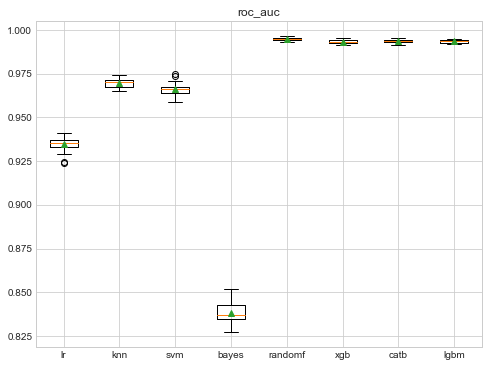

In [138]:
#Lets populate the accuracy of multiple models with a boxplot visualization to understand the spread and mean better
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#Boosting algorithms
import xgboost
import catboost as ctb
import lightgbm as lgb

from matplotlib import pyplot
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(multi_class='ovr',random_state=42)
    models['knn'] = KNeighborsClassifier()
    models['svm'] = SVC(random_state=42)
    models['bayes'] = GaussianNB()
    models['randomf'] = RandomForestClassifier(random_state=42)
    models['xgb'] = xgboost.XGBClassifier(random_state=42)
    models['catb']=ctb.CatBoostClassifier(random_state=42)
    models['lgbm']=lgb.LGBMClassifier(random_state=42)
    return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y,score):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring=score, cv=cv, n_jobs=-1, error_score=
    'raise')
    return scores
# get the models to evaluate
models = get_models()
scoring=['accuracy','f1','roc_auc']
metricarr, modelarr, resultsarr = list(), list(), list()
scoredf = pd.DataFrame()

# evaluate the models and store results
for scor in scoring:
    results, names = list(), list()
    print(f'Scoring Parameter - {scor}')
    for name, model in models.items():
        scores = evaluate_model(model, X_smote,Y_smote,scor)
        scorelength=len(scores)
        metricname=[scor]*scorelength
        modelname=[name]*scorelength
        results.append(scores)
        names.append(name)
        metricarr.append(metricname)
        modelarr.append(modelname)
        resultsarr.append(scores)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.title(scor)
    pyplot.show()
scoredf['Name']=modelarr
scoredf['Metric']=metricarr
scoredf['Scores']=resultsarr

In [141]:
scoredf.to_csv("Score.csv")

# Model Tuning

In [83]:
#Random Forest - SearchGridCV to identify the best parameter for model

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


from sklearn.model_selection import GridSearchCV

RFModel = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
rfCV = GridSearchCV(RFModel, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)
best_rfCV = rfCV.fit(X_smote,Y_smote)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


In [84]:
print(best_rfCV.best_estimator_)
print (f'Accuracy - : {best_rfCV.score(X_smote,Y_smote):.3f}')

grid_predictionsrf = best_rfCV.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionsrf))
print(classification_report(Y_test, grid_predictionsrf))

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)
Accuracy - : 0.938
[[9682 1004]
 [ 184 1161]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     10686
           1       0.54      0.86      0.66      1345

    accuracy                           0.90     12031
   macro avg       0.76      0.88      0.80     12031
weighted avg       0.93      0.90      0.91     12031



In [86]:
print(best_catCV.best_estimator_)
print (f'Accuracy - : {best_catCV.score(X_smote,Y_smote):.3f}')

grid_predictionscat = best_catCV.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscat))
print(classification_report(Y_test, grid_predictionscat))

Accuracy - : 0.982
[[10526   160]
 [  212  1133]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10686
           1       0.88      0.84      0.86      1345

    accuracy                           0.97     12031
   macro avg       0.93      0.91      0.92     12031
weighted avg       0.97      0.97      0.97     12031



In [ ]:
#Stack ensemble model with random forest as meta classifier, the learning classifiers are SVC and random forest.
# Lets check 3 scoring parameters to identify the performance better

import numpy as np
import warnings
from mlxtend.classifier import StackingClassifier
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


clf1 = fit_model1.best_estimator_
clf2 = fit_model.best_estimator_

sclf = StackingClassifier(classifiers=[clf1,clf2], 
                          use_probas=True,
                          meta_classifier=clf2)

scores=dict()  
for clf, label in zip([clf1, clf2, sclf], 
                      ['RandForest',
                       'CatBoost',
                      'Stacking Classifier']):
  scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1-score':'f1_macro'
           }
  
  scores[label] = model_selection.cross_validate(clf,  X_smote,Y_smote, 
                                              cv=5, scoring=scoring)
sorted(scores.keys())


modellabel=['RandForest','CatBoost','Stacking Classifier']
resultsacc, resultrecall,resultf1, names = list(), list(), list(), list()
for k in modellabel:
    
    resultsacc.append(scores[k]['test_accuracy'])
    resultrecall.append(scores[k]['test_recall'])
    resultf1.append(scores[k]['test_f1-score'])
    names.append(k)


from matplotlib import pyplot as plt
#fig, ax =plt.subplots(1,3)

plt.boxplot(resultsacc, labels=names, showmeans=True)
plt.title('Accuracy')
plt.show()


plt.boxplot(resultrecall, labels=names, showmeans=True)
plt.title('Recall')
plt.show()

plt.boxplot(resultf1, labels=names, showmeans=True)
plt.title('F1-Score')
plt.show()

In [90]:
sclf

StackingClassifier(classifiers=[RandomForestClassifier(max_depth=8,
                                                       max_features='auto',
                                                       random_state=43),
                                <catboost.core.CatBoostClassifier object at 0x000002238DB53D60>],
                   meta_classifier=<catboost.core.CatBoostClassifier object at 0x000002238DB53D60>,
                   use_probas=True)

# Model Evaluation

In [92]:
fit_model=catalog.load("fit_model")
fit_model1=catalog.load("fit_model1")
final_model=catalog.load("final_model")

[09/25/22 00:19:18] INFO     Loading data from 'fit_model' (PickleDataSet)...                   ]8;id=800365;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=697202;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'fit_model1' (PickleDataSet)...                  ]8;id=970204;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=339205;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'final_model' (PickleDataSet)...                 ]8;id=631186;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=31542;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [93]:
final_model

StackingClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x000002239CE17790>,
                                RandomForestClassifier(max_depth=8,
                                                       max_features='auto',
                                                       n_estimators=500,
                                                       random_state=43)],
                   meta_classifier=<catboost.core.CatBoostClassifier object at 0x000002239CE17790>,
                   use_probas=True)

In [94]:
fit_model.best_params_

{'depth': 6, 'learning_rate': 0.2, 'n_estimators': 200}

In [95]:
fit_model1.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}

In [96]:
grid_predictionscheck = fit_model.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscheck))
print(classification_report(Y_test, grid_predictionscheck))

[[10528   158]
 [  242  1103]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10686
           1       0.87      0.82      0.85      1345

    accuracy                           0.97     12031
   macro avg       0.93      0.90      0.91     12031
weighted avg       0.97      0.97      0.97     12031



In [97]:
grid_predictionscheck = fit_model1.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscheck))
print(classification_report(Y_test, grid_predictionscheck))

[[9703  983]
 [ 179 1166]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     10686
           1       0.54      0.87      0.67      1345

    accuracy                           0.90     12031
   macro avg       0.76      0.89      0.81     12031
weighted avg       0.93      0.90      0.91     12031



In [98]:
grid_predictionscheck = final_model.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscheck))
print(classification_report(Y_test, grid_predictionscheck))

[[10550   136]
 [  180  1165]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10686
           1       0.90      0.87      0.88      1345

    accuracy                           0.97     12031
   macro avg       0.94      0.93      0.93     12031
weighted avg       0.97      0.97      0.97     12031



In [109]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(Y_test, grid_predictionscheck))


0.9267220356412553


In [193]:
classification_report=catalog.load("classification_report")

[09/24/22 22:59:44] INFO     Loading data from 'classification_report' (PickleDataSet)...       ]8;id=739663;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=65767;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [194]:
classification_report

,precision,recall,f1-score,support
0,0.985869,0.979727,0.982788,10753.000000
1,0.837918,0.881847,0.859321,1278.000000
accuracy,0.969329,0.969329,0.969329,0.969329
macro avg,0.911894,0.930787,0.921055,12031.000000
weighted avg,0.970153,0.969329,0.969673,12031.000000


# Model Explanation

In [119]:
import shap

In [103]:
# Fits the explainer
explainer = shap.TreeExplainer(fit_model.best_estimator_)
# Calculates the SHAP values - It takes some time
shap_values = explainer.shap_values(X_test_scaled)

In [106]:
train_df1=train_df.drop('deposit', axis=1)
x_test_df=pd.DataFrame(X_test_scaled,columns=train_df1.columns)

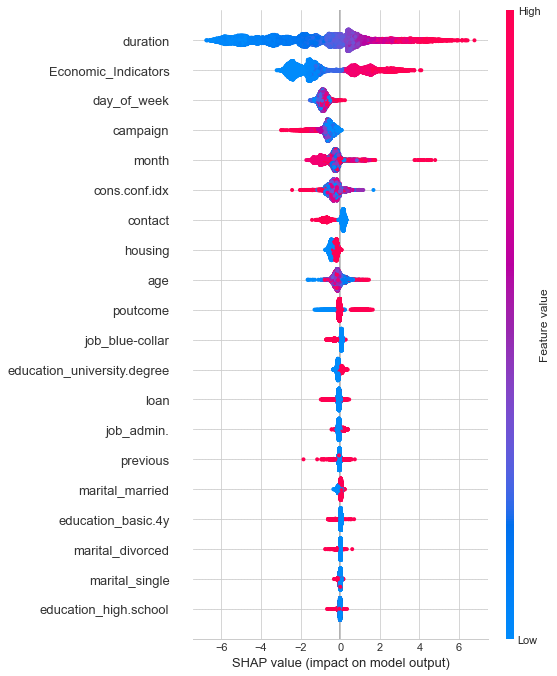

In [107]:
shap.summary_plot(shap_values,x_test_df)

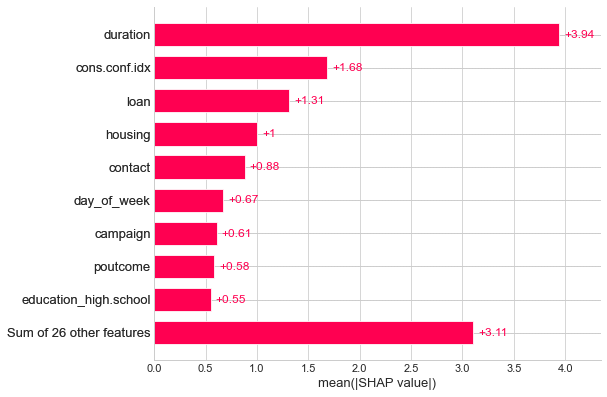

In [199]:
shap.plots.bar(shap_values)

In [121]:
# Fits the explainer
explainer1 = shap.Explainer(fit_model.predict, X_test_scaled)
# Calculates the SHAP values - It takes some time
shap_values1 = explainer1(X_test_scaled)


Permutation explainer: 12032it [35:05,  5.70it/s]                                                                                                   


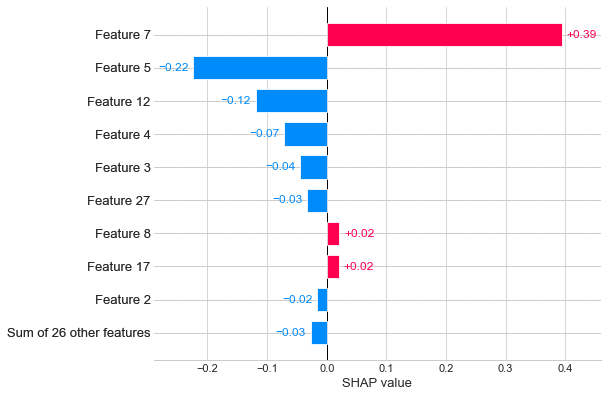

In [122]:
shap.plots.bar(shap_values1[0])

# Verification of Kedro Datasets

In [202]:
customer_final=catalog.load("customer_final")
inference_final=catalog.load("inference_final")

[09/24/22 23:02:01] INFO     Loading data from 'customer_final' (SQLTableDataSet)...            ]8;id=342870;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=49358;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

[09/24/22 23:02:02] INFO     Loading data from 'inference_final' (SQLTableDataSet)...           ]8;id=4785;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=331361;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [203]:
inference_final['Customer']=customer_final['Customer']

In [204]:
customer_final

,Customer
0,110001013
1,110001018
2,110001012
3,110001023
4,110001024
...,...
1995,110009978
1996,110009979
1997,110009982
1998,110009987
